<a href="https://colab.research.google.com/github/lucascheng24/COMP4432ML-DataProduct-A_Million_News_Headlines/blob/main/pre-process/word2vec_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/lucascheng24/COMP4432ML-DataProduct-A_Million_News_Headlines/main/raw_data/abcnews-date-text.csv'


df = pd.read_csv(url)

headlines = df['headline_text']

In [2]:
df.shape

(1244184, 2)

In [6]:
headlines

0          aba decides against community broadcasting lic...
1             act fire witnesses must be aware of defamation
2             a g calls for infrastructure protection summit
3                   air nz staff in aust strike for pay rise
4              air nz strike to affect australian travellers
                                 ...                        
1244179    two aged care residents die as state records 2...
1244180    victoria records 5;919 new cases and seven deaths
1244181      wa delays adopting new close contact definition
1244182    western ringtail possums found badly dehydrate...
1244183    what makes you a close covid contact here are ...
Name: headline_text, Length: 1244184, dtype: object

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

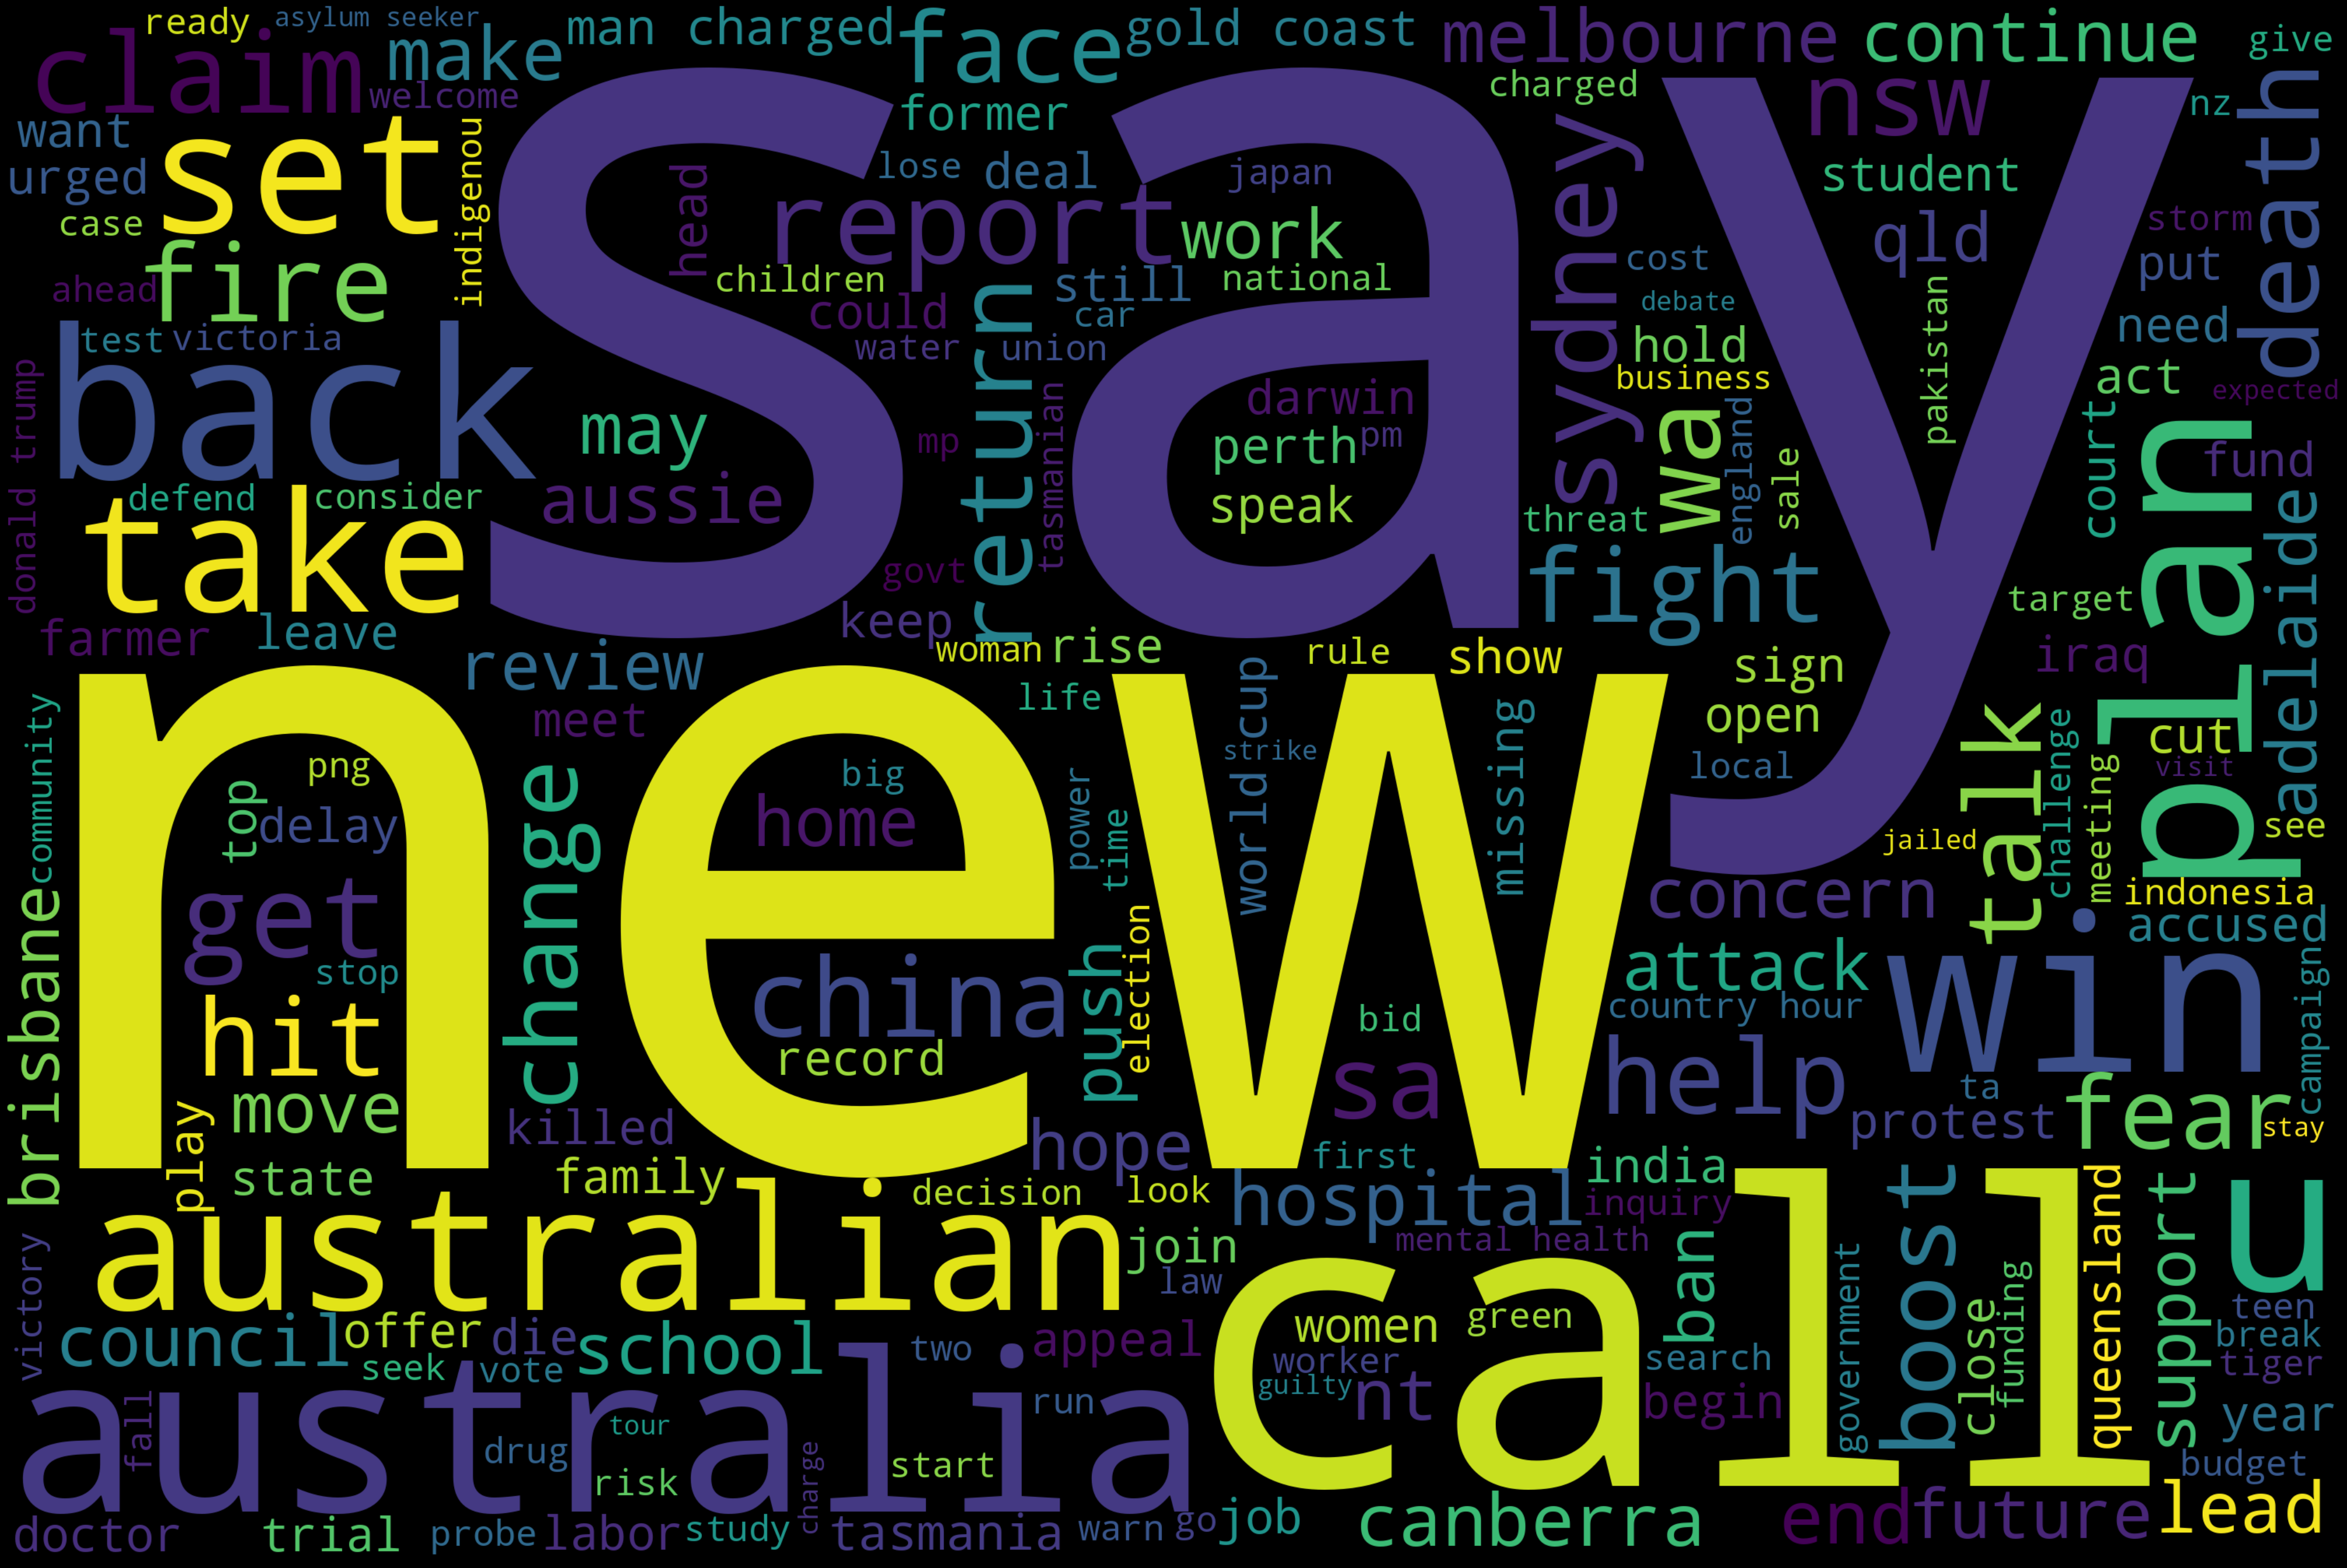

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Word Cloud of fake news
text = ''
for news in headlines.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

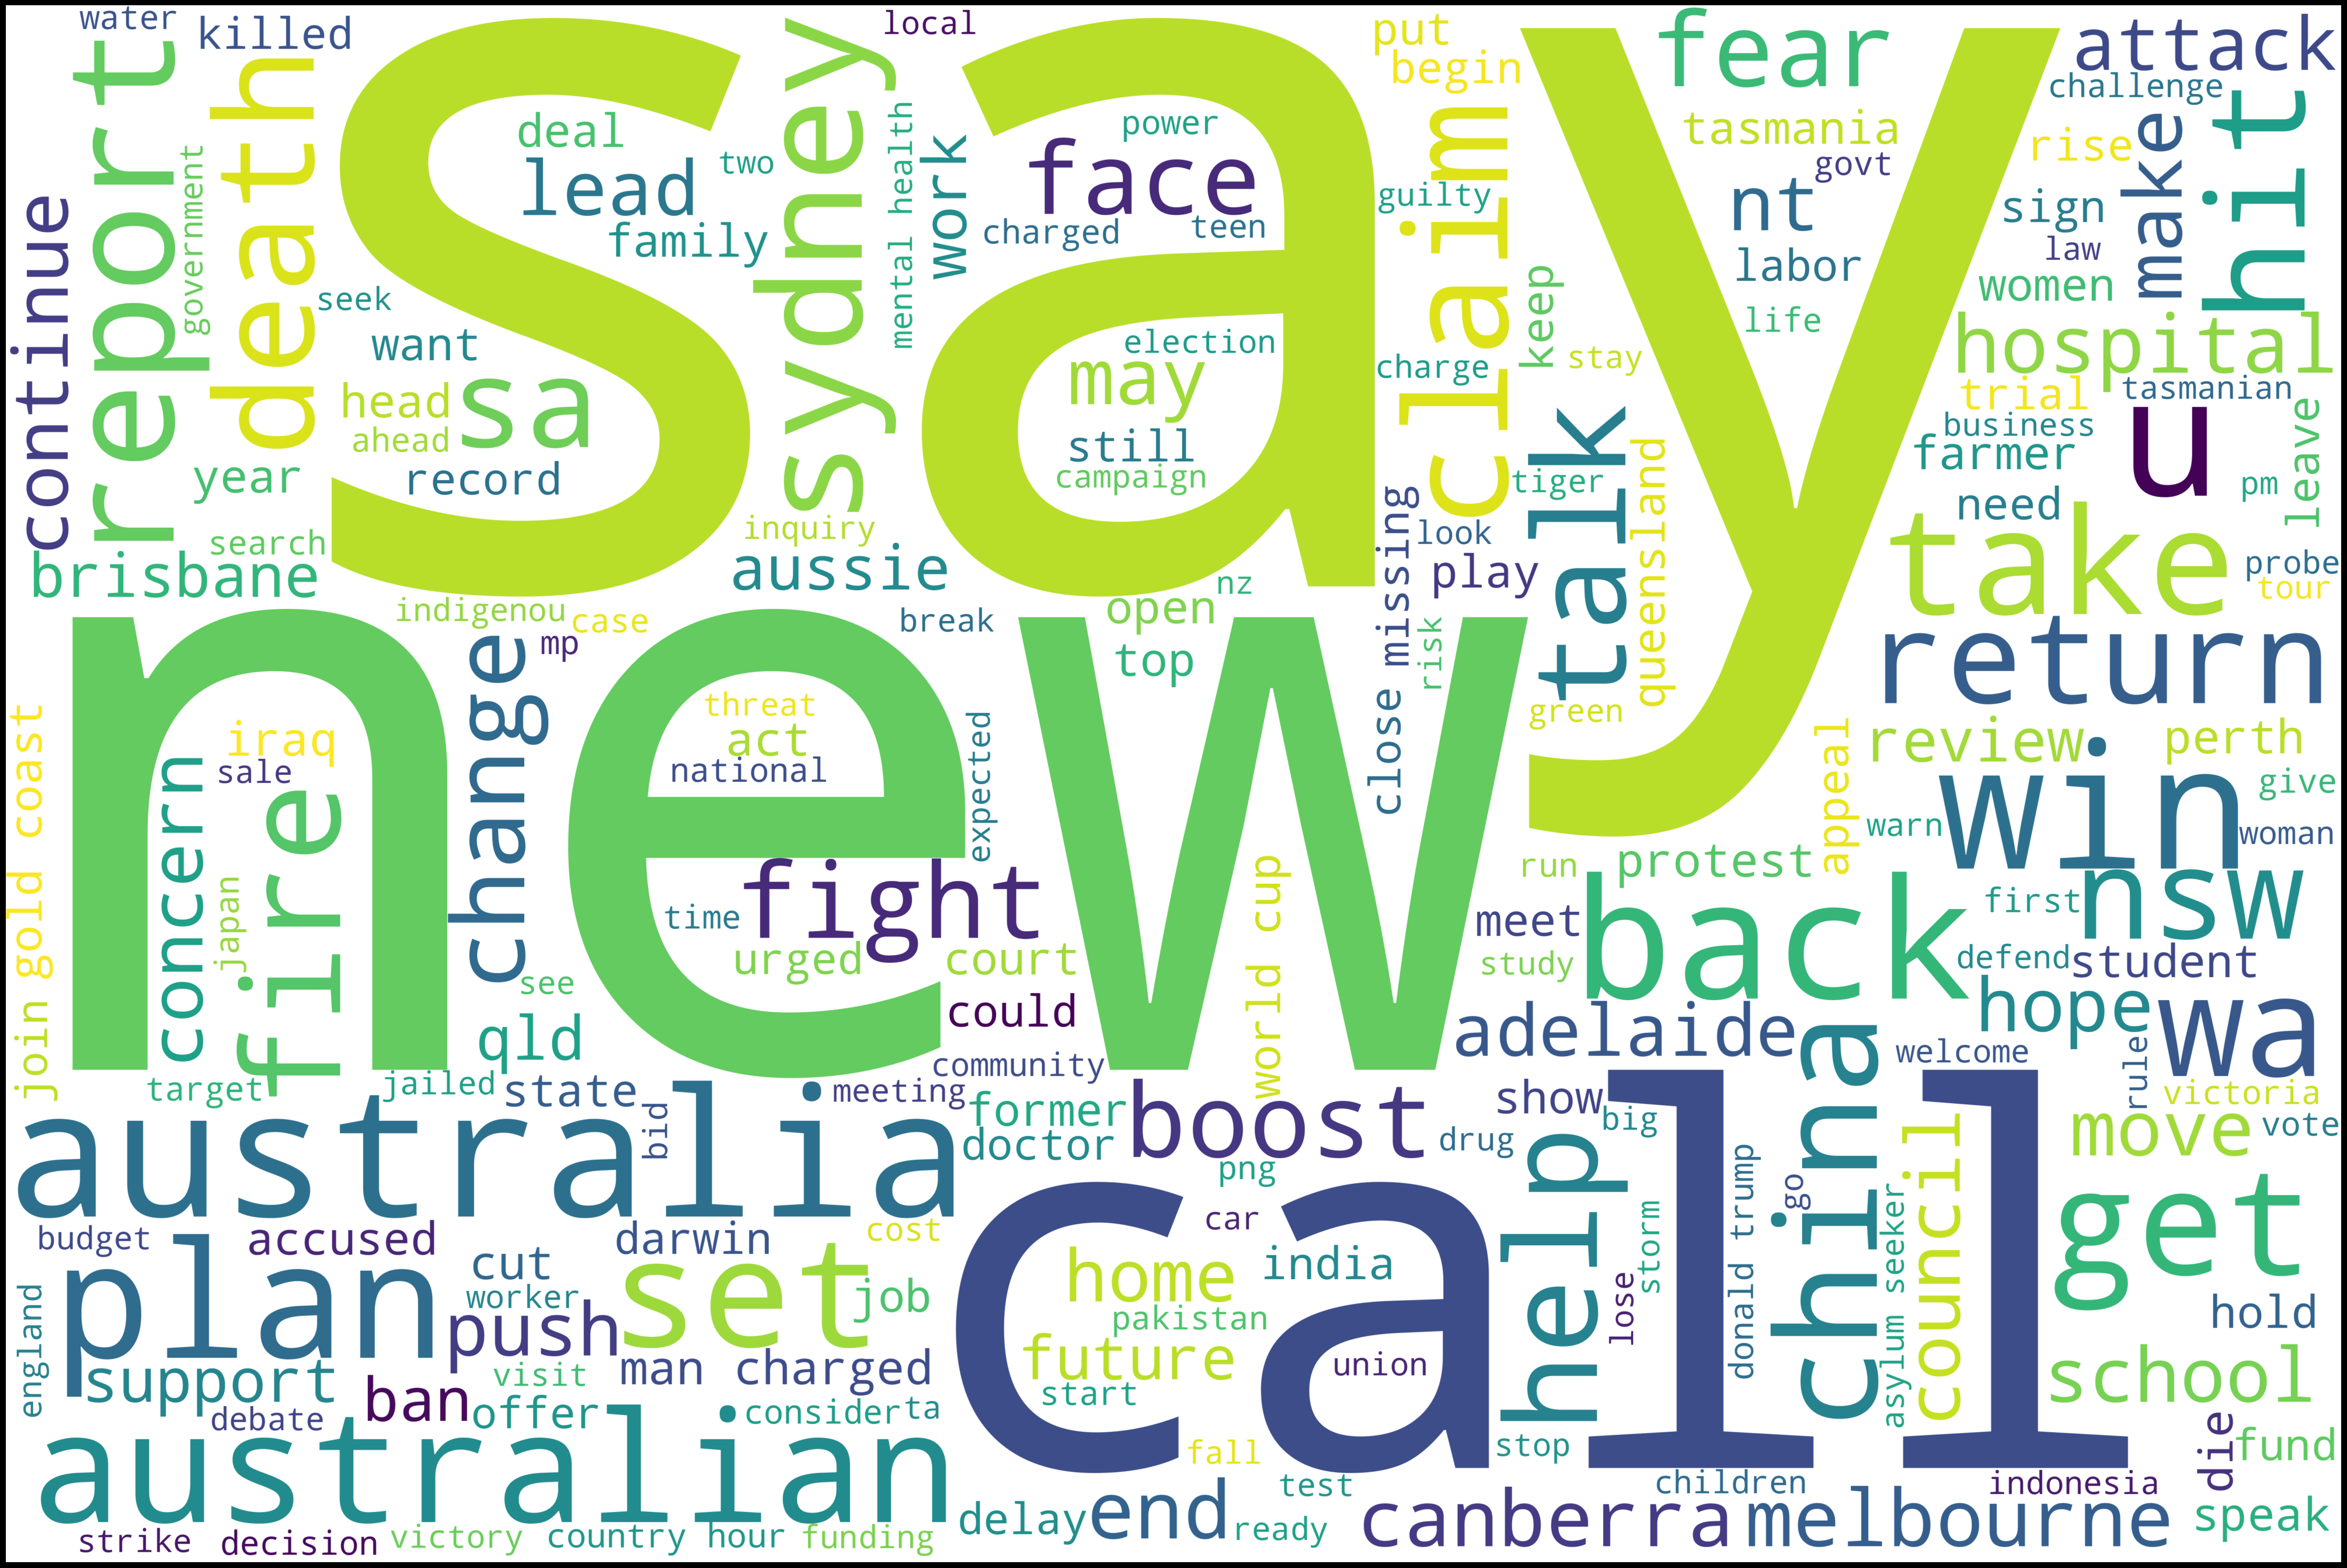

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Word Cloud of fake news
text = ''
for news in headlines.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 6000,
    height = 4000,
    background_color = 'white',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [4]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# print("stop_words:")
# stop_words
punctuation = set(string.punctuation)
# punctuation

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return tokens

preprocessed_headlines = [preprocess(headline) for headline in headlines]

In [5]:
from gensim.models.word2vec import Word2Vec
import numpy as np

#  using CBOW
model = Word2Vec(preprocessed_headlines, vector_size=100, window=5, min_count=1, workers=4)

# Train the word2vec model with 'skip-gram'
# model = Word2Vec(preprocessed_headlines, sg=1, size=100, window=5, min_count=5, workers=4)

# Get the Word2Vec vectors for each headline:
# headline_vectors = np.array()

headline_vectors = np.empty((len(preprocessed_headlines), model.vector_size), dtype=np.float32)

# Get the Word2Vec vectors for each headline:
headline_vectors = np.empty((len(preprocessed_headlines), model.vector_size), dtype=np.float32)

for i, headline in enumerate(preprocessed_headlines):
    vector = sum([model.wv[word] for word in headline if word in model.wv])
    headline_vectors[i] = vector

In [6]:
len(headline_vectors)

w2v_df = pd.DataFrame(headline_vectors, dtype=float)

In [8]:
w2v_df.head()

0         1         2         3         4         5         6   \
0 -0.634602  2.367594  0.871591  2.359430 -2.965852  1.517270  0.751504   
1 -0.378059 -0.452223  1.486985 -2.759467 -1.824923 -3.117064  2.082816   
2  1.261505  2.702031 -0.149906  3.614451 -0.837862 -2.099598  4.797093   
3  0.823092 -5.434307 -4.709791  3.259477 -1.074148  5.707097  5.959211   
4 -3.721574 -5.655051 -4.546373 -0.489267 -0.764316  3.468202  4.450593   

         7         8         9   ...        90        91        92        93  \
0  1.630334 -2.486295  1.074056  ...  1.185792 -0.805339 -0.940095  1.107344   
1  2.252490 -0.498469 -1.766992  ...  3.020952  2.685900 -3.133747  0.159911   
2  3.430388 -3.516436  1.159791  ... -0.820795 -1.944778 -4.270758  6.579325   
3  2.751780 -9.105801  1.704412  ... -7.428594 -3.320623 -4.405233 -5.242342   
4  4.336539 -4.282353  2.036829  ... -8.179373  0.642839 -2.795834 -2.692315   

         94        95        96        97        98        99  
0  2.540215  2.657502 -1.351613 -0.205754  3.341526  0.695853  
1  2.369867  2.457083  2.106743 -0.543559  1.498879  3.587365  
2 -1.320572  0.188916  1.429311 -1.423898  2.873578 -7.107896  
3  0.020884 -4.705878  1.534185 -8.562693  7.225168  6.823399  
4  2.987411 -3.875163  2.619176 -3.942276  6.260417  5.151134  

[5 rows x 100 columns]

In [9]:
w2v_df.shape

(1244184, 100)

In [10]:
file_name = '../processed_data/w2v_vec' + str(model.vector_size) + '_allRecords.csv'

# the file size is very large, above 5 GB(nearly 6 GB), it takes time to write the csv
w2v_df.to_csv(file_name, sep=',', encoding='utf-8', index=False)

or you can access the file in here google shared drive

the file is nearly 6GB

url: https://drive.google.com/drive/folders/1jD38rLvVf4jDOoNGryhX5xWg1p_3vED6?usp=share_link


In [16]:
model.wv.most_similar("terrorism")

[('terror', 0.9081593155860901),
 ('terrorist', 0.7901657819747925),
 ('graft', 0.663945734500885),
 ('terrorists', 0.6540829539299011),
 ('extremist', 0.6505410671234131),
 ('ji', 0.6478598117828369),
 ('sedition', 0.6306898593902588),
 ('criminal', 0.6065980195999146),
 ('corruption', 0.6031413078308105),
 ('extremism', 0.5940111875534058)]

In [17]:
model.wv.most_similar("disasters")

[('droughts', 0.6840882301330566),
 ('disaster', 0.670670747756958),
 ('tsunamis', 0.6402510404586792),
 ('heatwaves', 0.6386117935180664),
 ('yasi', 0.6363142728805542),
 ('aftershocks', 0.626413881778717),
 ('famine', 0.6199172139167786),
 ('haiyan', 0.6109275817871094),
 ('dire', 0.6078546047210693),
 ('eruptions', 0.6049690246582031)]

In [18]:

# model.wv.most_similar("broadcasting")

model.wv.most_similar("spigelman")

[('alston', 0.710935652256012),
 ('alda', 0.6963649392127991),
 ('broadcaster', 0.6673144102096558),
 ('comedic', 0.6665144562721252),
 ('eldridge', 0.6607124209403992),
 ('natt', 0.6589596271514893),
 ('guthrie', 0.6588374972343445),
 ('wilkins', 0.6540216207504272),
 ('cheshire', 0.6527613997459412),
 ('koval', 0.6510164141654968)]

In [19]:
model.wv.most_similar("covid")

[('coronavirus', 0.7987641096115112),
 ('flu', 0.6975151300430298),
 ('sars', 0.6577277183532715),
 ('omicron', 0.6370115876197815),
 ('astrazeneca', 0.618419885635376),
 ('measles', 0.5785689353942871),
 ('covid19', 0.5771754384040833),
 ('pfizer', 0.574914813041687),
 ('hendra', 0.5720527172088623),
 ('swine', 0.5570812225341797)]

In [20]:
model.wv["cat"].shape

(100,)

In [21]:
model.wv.similarity("cat", "dog")

0.74648356